# Lesson 1 : Image classification

This is my notebook on lesson one of Jermey Howard's deep learning course. Here we are looking at image classification and getting on of our own image classification models running. First we are looking into running an image classification model that can classify some dog and cat breeds, then we are going to look into one of our own. 

I will record any important notes throughout these lectures. However many parts may not go into great depth at the moment as Jermey focuses on getting us running the code and learning a layer at a time. 

## Project Setup

* import necessary dependancies
* import necessary data
* have a look at the data

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
print(installed_packages)

['absl-py', 'alabaster', 'albumentations', 'altair', 'asgiref', 'astor', 'astropy', 'astunparse', 'atari-py', 'atomicwrites', 'attrs', 'audioread', 'autograd', 'Babel', 'backcall', 'beautifulsoup4', 'bleach', 'blis', 'bokeh', 'boto', 'boto3', 'botocore', 'Bottleneck', 'branca', 'bs4', 'CacheControl', 'cachetools', 'catalogue', 'certifi', 'cffi', 'chainer', 'chardet', 'click', 'cloudpickle', 'cmake', 'cmdstanpy', 'colorlover', 'community', 'contextlib2', 'convertdate', 'coverage', 'coveralls', 'crcmod', 'cufflinks', 'cupy-cuda101', 'cvxopt', 'cvxpy', 'cycler', 'cymem', 'Cython', 'daft', 'dask', 'dataclasses', 'datascience', 'decorator', 'defusedxml', 'descartes', 'dill', 'distributed', 'Django', 'dlib', 'docopt', 'docutils', 'dopamine-rl', 'earthengine-api', 'easydict', 'ecos', 'editdistance', 'en-core-web-sm', 'entrypoints', 'ephem', 'et-xmlfile', 'fa2', 'fancyimpute', 'fastai', 'fastdtw', 'fastprogress', 'fastrlock', 'fbprophet', 'feather-format', 'featuretools', 'filelock', 'firebase

In [4]:
if 'fastai' in installed_packages:
  print("installed yayay :)")
else:
  print('not installed :( ')

installed yayay :)


In [5]:
# importing fastai and checking out it's version
import fastai
from fastai import *
from fastai.vision import *
print("fastai version: ", fastai.__version__)

fastai version:  1.0.61


In [0]:
# !pip install "torch==1.4" "torchvision==0.5.0"
# print(torch.__version__)

In [7]:
print(torch.__version__)

1.4.0


In [0]:
# declearing the batch size
bs = 64


In [8]:
# Let's grab our data
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [9]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
# let's setup some variable paths that point to these directories
path_anno = path/'annotations'
path_img = path/'images'

In [11]:
# Let's grab some of the images and have a look at their paths
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_176.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_150.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_84.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_102.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [13]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,keeshond,staffordshire_bull_terrier,yorkshire_terrier,Birman
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Persian,Bombay,saint_bernard,miniature_pinscher,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

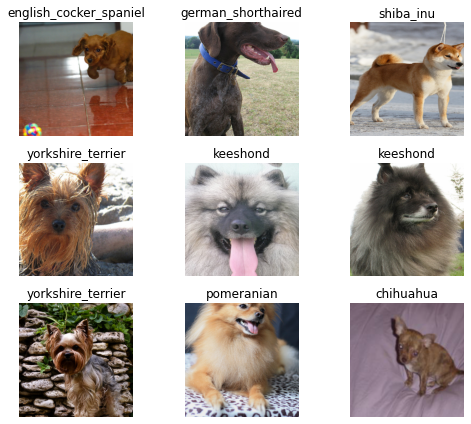

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
# Let's now have a look at the data classes
print(data.classes)
len(data.classes),data.c


['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

There are 37 different classes here of cat and dog breeds

## Training

Now that we have had a look at the data we are going to training our first model :) 

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.395676,0.311761,0.100135,01:28
1,0.597938,0.285845,0.082544,01:29
2,0.346470,0.220412,0.071042,01:28
3,0.262584,0.225476,0.065629,01:28


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
learn.save('stage-1')

## Results

Now we are going to look at our results

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

True

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


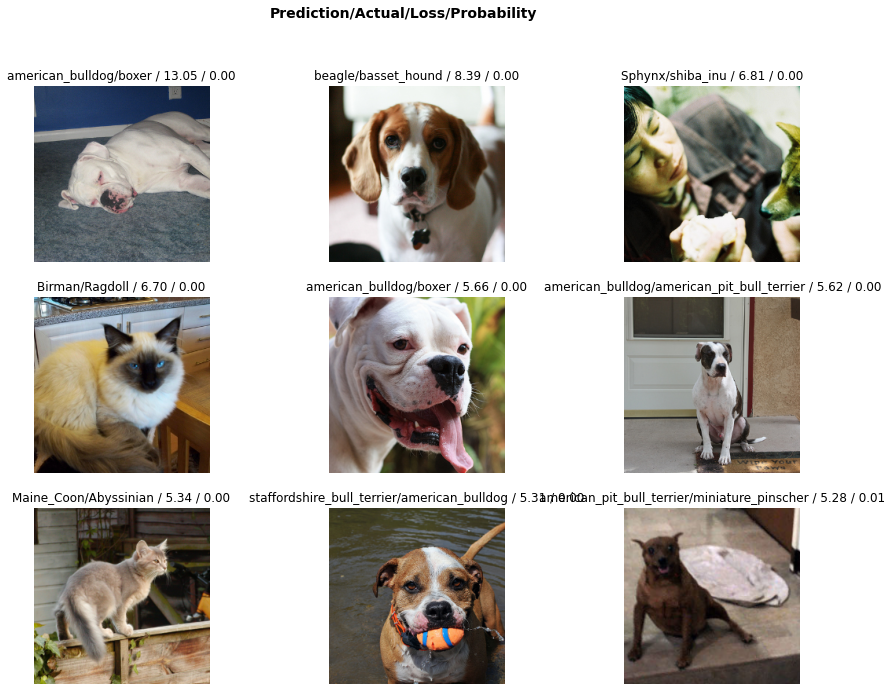

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
doc(interp.plot_top_losses)


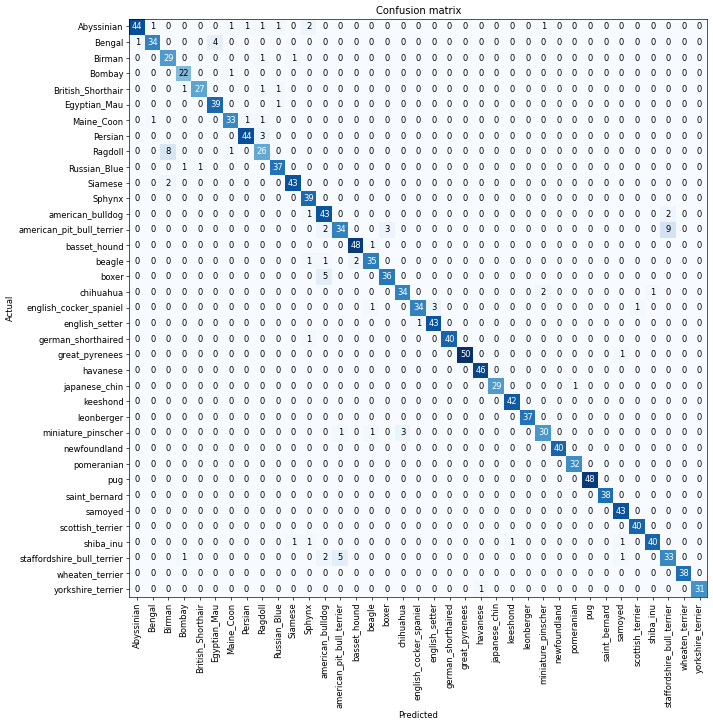

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)


[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Ragdoll', 'Birman', 8),
 ('boxer', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Persian', 'Ragdoll', 3),
 ('american_pit_bull_terrier', 'boxer', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [0]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.670015,0.389633,0.111637,01:32


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
learn.load('stage-1');

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


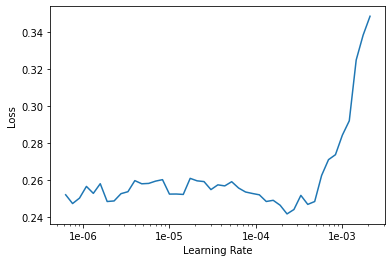

In [25]:
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.244982,0.210482,0.065629,01:31
1,0.215268,0.208790,0.062923,01:32


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

That's a pretty accurate model there. However can we make it better? Yes we can use a resnet50 

## Resnet50

Resnet34 is a 34 layer network whereas a Resnet50 is a 50 layer network. We will look into this in more detail to come. 

Usually Resnet50 preforms better because it has a deeper network with more parameters. To help it, we will also use larger images since that way the network can see more details. Also to prevent the GPU from getting overloaded we will also decrease the batch size. 

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [19]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


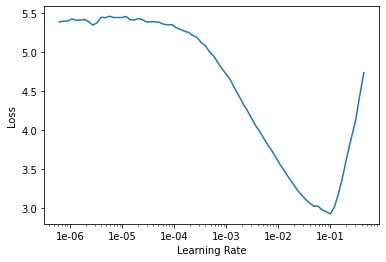

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.732317,0.352772,0.096076,02:23
1,0.495691,0.271372,0.083221,02:18
2,0.386014,0.271097,0.080514,02:17
3,0.339344,0.252420,0.068336,02:18
4,0.239243,0.226772,0.064276,02:17
5,0.167706,0.213869,0.062246,02:18
6,0.119080,0.197566,0.054804,02:17
7,0.108086,0.184245,0.052774,02:17


In [0]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [23]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.106539,0.180675,0.045332,02:39
1,0.096022,0.188113,0.053451,02:38
2,0.083150,0.184494,0.051421,02:37


In [0]:
learn.load('stage-1-50');


In [25]:
interp = ClassificationInterpretation.from_learner(learn)


In [26]:
interp.most_confused(min_val=2)


[('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Birman', 'Ragdoll', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('Birman', 'Siamese', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]